## Load functions

In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
# test data
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
from utils import vis_tsne, plot_elbow, vis_umap

In [2]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

def plot_dendro(X, link_method, annotate_threshold, hline):
    """
    link_method: single or ward
    """
    labelList = range(np.shape(X)[0])
    linked = linkage(X, link_method)
    fancy_dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            max_d = hline,
            annotate_above=annotate_threshold)
    plt.show()

def dendro_cluster(X, threshold, link_method, view=False):
    f_cut = fcluster(linkage(X, method=link_method), threshold,criterion='distance')
    if view:
        vis_tsne(X,f_cut)
        vis_umap(X, f_cut)
    return f_cut

## plot dendrogram

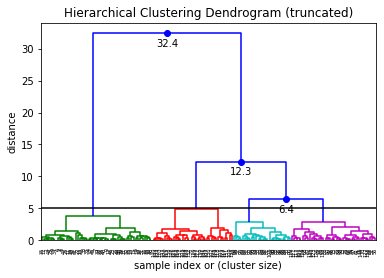

In [3]:
X = load_iris().data
link_method = 'ward'
annotate_threshold = 5
hline = 5
plot_dendro(X, link_method, annotate_threshold, hline)

## Calculate the Silhouette score

For cutoff = 25, silhouette score is 0.6867350732769776
For cutoff = 10, silhouette score is 0.5543236611296415
For cutoff = 5, silhouette score is 0.4889670857554686
For cutoff = 2, silhouette score is 0.3304886352874647
For cutoff = 1, silhouette score is 0.28217328285289367


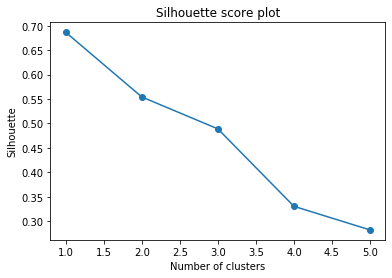

In [4]:
cut_off_list = [25, 10, 5, 2, 1]
silhouette_score_list = []
for i_cut in cut_off_list:
    membership = dendro_cluster(X, i_cut, link_method, view=False)
    tmp_score = silhouette_score(X, membership)
    silhouette_score_list.append(tmp_score)
    print("For cutoff = {}, silhouette score is {}".format(i_cut, tmp_score))

plot_elbow(1, len(cut_off_list)+1, silhouette_score_list,'Silhouette', 'Silhouette score plot')

## Choose the optimal cutoff and visualize clusters

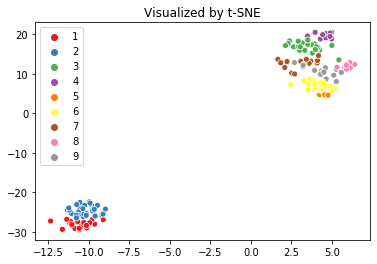

/Users/yuexichen/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


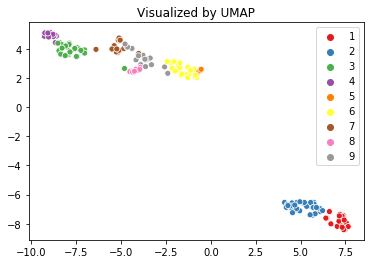

[2 1 1 1 2 2 1 2 1 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 2 2 2 1 1 2 2 2 1 1 2
 2 1 2 2 1 1 2 2 1 2 1 2 2 8 9 8 6 8 6 9 5 8 6 5 9 6 9 6 8 6 6 7 6 9 9 7 9
 9 8 8 3 9 6 6 6 6 7 6 9 8 7 6 6 6 9 6 5 6 6 6 9 5 6 3 7 4 3 3 4 6 4 3 4 3
 3 3 7 7 3 3 4 4 7 3 7 4 7 3 4 7 9 3 4 4 4 3 7 7 4 3 3 9 3 3 3 7 3 3 3 7 3
 3 9]


In [5]:
cut_off = 2
membership = dendro_cluster(X, cut_off, link_method, view=True)
print(membership)

## save cluster memberships

In [6]:
np.save("hierarchical_membership.npy",membership)